# Modelo de Regresion Logistica Binaria

In [44]:
# Librerias
import pandas as pd
import numpy as np

# Datos Preprocesados de train_data

In [45]:
# cargar datos preprocesados
df = pd.read_csv('./Datos_Hackaton/train_data_preparado_.csv', sep=';')
df

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
0,100247,1020740,1,Híbrida,176,1,Mujer,Ferias & Networking,1,25/11/1999,140011,990,75,25/01/2018,Soltero,0
1,103355,1021150,1,Híbrida,76,2,Hombre,Ferias & Networking,2,16/10/1996,182774,990,81,24/07/2021,Soltero,1
2,100669,1020600,1,Híbrida,495,3,Mujer,Referidos,11,29/01/1971,682106,960,74,13/07/2016,Viudo,0
3,103760,1020620,1,Híbrida,1303,2,Hombre,Linkedin,2,28/04/1992,270232,960,82,21/07/2014,Soltero,1
4,100965,1020620,1,Híbrida,13045,2,Hombre,Linkedin,2,3/05/1992,266804,950,82,22/07/2014,Soltero,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,100824,1021470,1,Presencial,651,8,Mujer,Portal Web,15,2/02/1975,294641,120,79,16/03/2022,Soltero,1
1991,103863,1021470,1,Presencial,652,8,Mujer,Portal Web,15,15/03/1975,301334,120,79,18/03/2022,Soltero,1
1992,102945,1021540,1,Presencial,121,1,Hombre,Portal Web,6,3/07/1967,738060,120,77,2/05/2023,Divorciado,0
1993,103973,1021570,1,Presencial,4735,2,Mujer,Linkedin,12,22/09/1968,715749,110,81,23/06/2022,Soltero,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_colaborador        1995 non-null   int64 
 1   id_ultimo_jefe        1995 non-null   int64 
 2   seniority             1995 non-null   int64 
 3   modalidad_trabajo     1995 non-null   object
 4   distancia_oficina     1995 non-null   int64 
 5   dias_baja_salud       1995 non-null   int64 
 6   genero                1995 non-null   object
 7   canal_reclutamiento   1995 non-null   object
 8   permanencia_promedio  1995 non-null   int64 
 9   fecha_nacimiento      1995 non-null   object
 10  salario               1995 non-null   int64 
 11  performance_score     1995 non-null   int64 
 12  psi_score             1995 non-null   int64 
 13  fecha_incorporacion   1995 non-null   object
 14  estado_civil          1995 non-null   object
 15  abandono_6meses       1995 non-null   

## Obtener Edad de ingreso de los empleados

In [47]:
# copia del dataframe
df_prep = df.copy(deep=True)
df_prep.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
0,100247,1020740,1,Híbrida,176,1,Mujer,Ferias & Networking,1,25/11/1999,140011,990,75,25/01/2018,Soltero,0
1,103355,1021150,1,Híbrida,76,2,Hombre,Ferias & Networking,2,16/10/1996,182774,990,81,24/07/2021,Soltero,1
2,100669,1020600,1,Híbrida,495,3,Mujer,Referidos,11,29/01/1971,682106,960,74,13/07/2016,Viudo,0
3,103760,1020620,1,Híbrida,1303,2,Hombre,Linkedin,2,28/04/1992,270232,960,82,21/07/2014,Soltero,1
4,100965,1020620,1,Híbrida,13045,2,Hombre,Linkedin,2,3/05/1992,266804,950,82,22/07/2014,Soltero,0


In [48]:
# convertimos las variables fecha_incorporacion y fecha_nacimiento en a tipo datetime

# fecha_incorporacion
df_prep['fecha_incorporacion'] = pd.to_datetime(df_prep['fecha_incorporacion'], format='%d/%m/%Y')

# fecha_nacimiento
df_prep['fecha_nacimiento'] = pd.to_datetime(df_prep['fecha_nacimiento'], format='%d/%m/%Y')

# crear variable year_nacimiento
df_prep['year_nacimiento'] = df_prep['fecha_nacimiento'].dt.year.astype(int)

# crear variable year_incorporacion
df_prep['year_incorporacion'] = df_prep['fecha_incorporacion'].dt.year.astype(int)

# mostrar resultados
df_prep.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses,year_nacimiento,year_incorporacion
0,100247,1020740,1,Híbrida,176,1,Mujer,Ferias & Networking,1,1999-11-25,140011,990,75,2018-01-25,Soltero,0,1999,2018
1,103355,1021150,1,Híbrida,76,2,Hombre,Ferias & Networking,2,1996-10-16,182774,990,81,2021-07-24,Soltero,1,1996,2021
2,100669,1020600,1,Híbrida,495,3,Mujer,Referidos,11,1971-01-29,682106,960,74,2016-07-13,Viudo,0,1971,2016
3,103760,1020620,1,Híbrida,1303,2,Hombre,Linkedin,2,1992-04-28,270232,960,82,2014-07-21,Soltero,1,1992,2014
4,100965,1020620,1,Híbrida,13045,2,Hombre,Linkedin,2,1992-05-03,266804,950,82,2014-07-22,Soltero,0,1992,2014


Ahora, eliminamos las variables de tipo datetime para no incluirla en el modelo

In [49]:
# eliminar fecha_incorporacion
df_prep = df_prep.drop('fecha_incorporacion', axis=1)

# eliminar fecha_nacimiento
df_prep = df_prep.drop('fecha_nacimiento', axis=1)

# mostrar resultados
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_colaborador        1995 non-null   int64 
 1   id_ultimo_jefe        1995 non-null   int64 
 2   seniority             1995 non-null   int64 
 3   modalidad_trabajo     1995 non-null   object
 4   distancia_oficina     1995 non-null   int64 
 5   dias_baja_salud       1995 non-null   int64 
 6   genero                1995 non-null   object
 7   canal_reclutamiento   1995 non-null   object
 8   permanencia_promedio  1995 non-null   int64 
 9   salario               1995 non-null   int64 
 10  performance_score     1995 non-null   int64 
 11  psi_score             1995 non-null   int64 
 12  estado_civil          1995 non-null   object
 13  abandono_6meses       1995 non-null   int64 
 14  year_nacimiento       1995 non-null   int64 
 15  year_incorporacion    1995 non-null   

Obtener edad de ingreso de los empleados

In [50]:
df_prep['edad_ingreso'] = df_prep['year_incorporacion'] - df_prep['year_nacimiento']

df_prep.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,abandono_6meses,year_nacimiento,year_incorporacion,edad_ingreso
0,100247,1020740,1,Híbrida,176,1,Mujer,Ferias & Networking,1,140011,990,75,Soltero,0,1999,2018,19
1,103355,1021150,1,Híbrida,76,2,Hombre,Ferias & Networking,2,182774,990,81,Soltero,1,1996,2021,25
2,100669,1020600,1,Híbrida,495,3,Mujer,Referidos,11,682106,960,74,Viudo,0,1971,2016,45
3,103760,1020620,1,Híbrida,1303,2,Hombre,Linkedin,2,270232,960,82,Soltero,1,1992,2014,22
4,100965,1020620,1,Híbrida,13045,2,Hombre,Linkedin,2,266804,950,82,Soltero,0,1992,2014,22


Eliminar los años tanto de incorporacion como de nacimiento

In [51]:
# eliminar year_nacimiento
df_prep = df_prep.drop('year_nacimiento', axis=1)

# eliminar year_incorporacion
df_prep = df_prep.drop('year_incorporacion', axis=1)

# mostrar resultados
df_prep.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,abandono_6meses,edad_ingreso
0,100247,1020740,1,Híbrida,176,1,Mujer,Ferias & Networking,1,140011,990,75,Soltero,0,19
1,103355,1021150,1,Híbrida,76,2,Hombre,Ferias & Networking,2,182774,990,81,Soltero,1,25
2,100669,1020600,1,Híbrida,495,3,Mujer,Referidos,11,682106,960,74,Viudo,0,45
3,103760,1020620,1,Híbrida,1303,2,Hombre,Linkedin,2,270232,960,82,Soltero,1,22
4,100965,1020620,1,Híbrida,13045,2,Hombre,Linkedin,2,266804,950,82,Soltero,0,22


In [52]:
# copia del dataframe
df_X = df.copy(deep=True)
df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
0,100247,1020740,1,Híbrida,176,1,Mujer,Ferias & Networking,1,25/11/1999,140011,990,75,25/01/2018,Soltero,0
1,103355,1021150,1,Híbrida,76,2,Hombre,Ferias & Networking,2,16/10/1996,182774,990,81,24/07/2021,Soltero,1
2,100669,1020600,1,Híbrida,495,3,Mujer,Referidos,11,29/01/1971,682106,960,74,13/07/2016,Viudo,0
3,103760,1020620,1,Híbrida,1303,2,Hombre,Linkedin,2,28/04/1992,270232,960,82,21/07/2014,Soltero,1
4,100965,1020620,1,Híbrida,13045,2,Hombre,Linkedin,2,3/05/1992,266804,950,82,22/07/2014,Soltero,0


## Transformar variables Categoricas a numericas

In [53]:
# Convertimos variables categoricas en numericas con get_dummies
df_prep = pd.get_dummies(df_prep)
df_prep.head(5)

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,100247,1020740,1,176,1,1,140011,990,75,0,...,1,1,0,0,0,0,0,0,1,0
1,103355,1021150,1,76,2,2,182774,990,81,1,...,0,1,0,0,0,0,0,0,1,0
2,100669,1020600,1,495,3,11,682106,960,74,0,...,1,0,0,0,0,1,0,0,0,1
3,103760,1020620,1,1303,2,2,270232,960,82,1,...,0,0,0,1,0,0,0,0,1,0
4,100965,1020620,1,13045,2,2,266804,950,82,0,...,0,0,0,1,0,0,0,0,1,0


## Analisis de Correlacion

In [54]:
import matplotlib.pyplot as plt

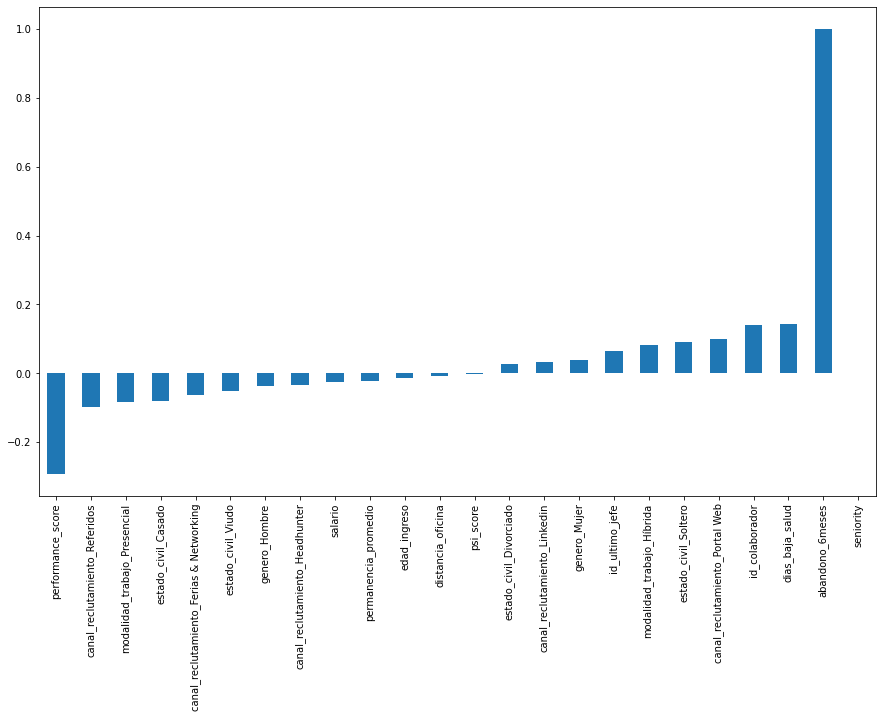

In [55]:
fig = plt.figure(figsize=(15,9))
df_prep.corr()['abandono_6meses'].sort_values(ascending=True).plot(kind='bar')
plt.show()

- La variable **performance_score** es la que mayor correlacion presenta con la variable objetivo
- La variable **dias_baja_salud** es la segunda con mayor correlacion con la variables objetivo
- A pesar que existe correlacion entre algunas variables, esta es baja.

## Seleccion de variables predictoras y objetivo

In [56]:
# variables predictoras
X = df_prep.drop('abandono_6meses',axis=1)

# variables objetivo
y = df_prep['abandono_6meses'].values

## Escalar los datos

In [57]:
# libreria para escalar datos
from sklearn.preprocessing import MinMaxScaler

In [58]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xs =  scaler.fit_transform(X)

In [59]:
# pasamos las variables predictoras a un dataframe
Xs = pd.DataFrame(Xs)

Xs

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.058993,0.430233,0.0,0.008285,0.028571,0.000000,0.075125,1.000000,0.425,0.20,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.804317,0.668605,0.0,0.003523,0.057143,0.041667,0.125725,1.000000,0.575,0.32,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160192,0.348837,0.0,0.023473,0.085714,0.416667,0.716564,0.967033,0.400,0.72,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.901439,0.360465,0.0,0.061944,0.057143,0.041667,0.229210,0.967033,0.600,0.26,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.231175,0.360465,0.0,0.621007,0.057143,0.041667,0.225154,0.956044,0.600,0.26,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,0.197362,0.854651,0.0,0.030900,0.228571,0.583333,0.258093,0.043956,0.525,0.76,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1991,0.926139,0.854651,0.0,0.030948,0.228571,0.583333,0.266012,0.043956,0.525,0.76,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1992,0.705995,0.895349,0.0,0.005666,0.028571,0.208333,0.782772,0.043956,0.475,0.94,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1993,0.952518,0.912791,0.0,0.225349,0.057143,0.458333,0.756373,0.032967,0.575,0.90,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
# recuperamos los nombres de las variables predictoras
Xs.columns = X.columns
Xs

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,0.058993,0.430233,0.0,0.008285,0.028571,0.000000,0.075125,1.000000,0.425,0.20,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.804317,0.668605,0.0,0.003523,0.057143,0.041667,0.125725,1.000000,0.575,0.32,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160192,0.348837,0.0,0.023473,0.085714,0.416667,0.716564,0.967033,0.400,0.72,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.901439,0.360465,0.0,0.061944,0.057143,0.041667,0.229210,0.967033,0.600,0.26,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.231175,0.360465,0.0,0.621007,0.057143,0.041667,0.225154,0.956044,0.600,0.26,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,0.197362,0.854651,0.0,0.030900,0.228571,0.583333,0.258093,0.043956,0.525,0.76,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1991,0.926139,0.854651,0.0,0.030948,0.228571,0.583333,0.266012,0.043956,0.525,0.76,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1992,0.705995,0.895349,0.0,0.005666,0.028571,0.208333,0.782772,0.043956,0.475,0.94,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1993,0.952518,0.912791,0.0,0.225349,0.057143,0.458333,0.756373,0.032967,0.575,0.90,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Datos Preprocesados de test_data

In [61]:
df_test = pd.read_csv('./Datos_Hackaton/test_data_preparado.csv', sep=',')
df_test.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


## Obtener Edad de ingreso de los empleados

In [62]:
# copia del dataframe
df_X = df_test.copy(deep=True)
df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


In [63]:
# convertimos las variables fecha_incorporacion y fecha_nacimiento en a tipo datetime

# fecha_incorporacion
df_X['fecha_incorporacion'] = pd.to_datetime(df_X['fecha_incorporacion'], format='%d/%m/%Y')

# fecha_nacimiento
df_X['fecha_nacimiento'] = pd.to_datetime(df_X['fecha_nacimiento'], format='%d/%m/%Y')

# crear variable year_nacimiento
df_X['year_nacimiento'] = df_X['fecha_nacimiento'].dt.year.astype(int)

# crear variable year_incorporacion
df_X['year_incorporacion'] = df_X['fecha_incorporacion'].dt.year.astype(int)

# mostrar resultados
df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,year_nacimiento,year_incorporacion
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,1997-01-19,181654,99,81,2021-07-24,Soltero,1997,2021
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,1999-08-20,140986,97,75,2018-01-27,Soltero,1999,2018
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,1984-10-29,406690,96,69,2022-04-24,Soltero,1984,2022
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,1992-11-09,249107,95,73,2023-05-23,Casado,1992,2023
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,1969-07-14,698318,95,81,2015-06-20,Viudo,1969,2015


In [64]:
# eliminar fecha_incorporacion
df_X = df_X.drop('fecha_incorporacion', axis=1)

# eliminar fecha_nacimiento
df_X = df_X.drop('fecha_nacimiento', axis=1)

# mostrar resultados
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_colaborador        2020 non-null   int64  
 1   id_ultimo_jefe        2020 non-null   float64
 2   seniority             2020 non-null   int64  
 3   modalidad_trabajo     2020 non-null   object 
 4   distancia_oficina     2020 non-null   float64
 5   dias_baja_salud       2020 non-null   int64  
 6   genero                2020 non-null   object 
 7   canal_reclutamiento   2020 non-null   object 
 8   permanencia_promedio  2020 non-null   int64  
 9   salario               2020 non-null   int64  
 10  performance_score     2020 non-null   int64  
 11  psi_score             2020 non-null   int64  
 12  estado_civil          2020 non-null   object 
 13  year_nacimiento       2020 non-null   int64  
 14  year_incorporacion    2020 non-null   int64  
dtypes: float64(2), int64(

In [65]:
df_X['edad_ingreso'] = df_X['year_incorporacion'] - df_X['year_nacimiento']

df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,year_nacimiento,year_incorporacion,edad_ingreso
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,181654,99,81,Soltero,1997,2021,24
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,140986,97,75,Soltero,1999,2018,19
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,406690,96,69,Soltero,1984,2022,38
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,249107,95,73,Casado,1992,2023,31
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,698318,95,81,Viudo,1969,2015,46


In [66]:
# eliminar year_nacimiento
df_X = df_X.drop('year_nacimiento', axis=1)

# eliminar year_incorporacion
df_X = df_X.drop('year_incorporacion', axis=1)

# mostrar resultados
df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,edad_ingreso
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,181654,99,81,Soltero,24
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,140986,97,75,Soltero,19
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,406690,96,69,Soltero,38
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,249107,95,73,Casado,31
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,698318,95,81,Viudo,46


## Convertir variables categoricas a numericas

In [67]:
# Convertimos variables categoricas en numericas con get_dummies
df_X = pd.get_dummies(df_X)
df_X.head(5)

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,100486,102115.0,1,0.795,2,2,181654,99,81,24,...,0,1,0,0,0,0,0,0,1,0
1,103752,102074.0,1,1.715,1,1,140986,97,75,19,...,1,1,0,0,0,0,0,0,1,0
2,103937,102150.0,1,2.375,1,6,406690,96,69,38,...,0,0,0,0,1,0,0,0,1,0
3,101744,102172.0,1,2.185,3,3,249107,95,73,31,...,0,0,0,1,0,0,1,0,0,0
4,101037,102060.0,1,4.660,3,10,698318,95,81,46,...,0,0,0,0,0,1,0,0,0,1


## Escalar datos de Test

In [68]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xt =  scaler.fit_transform(df_X)

In [69]:
# pasamos las variables predictoras a un dataframe
Xt = pd.DataFrame(Xt)

# recuperamos los nombres de las variables predictoras
Xt.columns = df_X.columns
Xt

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,0.116491,0.668605,0.0,0.049157,0.086957,0.038462,0.058174,1.000000,0.575,0.264151,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.899329,0.430233,0.0,0.115178,0.043478,0.000000,0.035884,0.894737,0.425,0.169811,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.943672,0.872093,0.0,0.162540,0.043478,0.192308,0.181516,0.842105,0.275,0.528302,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.418025,1.000000,0.0,0.148906,0.130435,0.076923,0.095145,0.789474,0.375,0.396226,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.248562,0.348837,0.0,0.326516,0.130435,0.346154,0.341358,0.789474,0.575,0.679245,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.900048,0.936047,0.0,0.207033,0.086957,0.576923,0.342726,0.526316,0.275,0.811321,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2016,0.953020,0.994186,0.0,0.191245,0.000000,0.153846,0.329712,0.684211,0.200,0.811321,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2017,0.986337,0.837209,0.0,0.278436,0.043478,0.230769,0.438901,0.210526,0.275,0.811321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2018,0.939597,0.883721,0.0,0.501615,0.043478,0.269231,0.352749,0.578947,0.425,0.849057,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Entrenamiento del Modelo

In [70]:
# dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y, test_size=0.3, random_state=42)

In [71]:
# llamada del modelo
from sklearn.linear_model import LogisticRegression

# instanciamos el modelo en una variable
model = LogisticRegression()

# entrenamos el modelo con los datos de entrenamiento
result = model.fit(X_train, y_train)

In [72]:
# llamamos las metricas del modelo
from sklearn import metrics

# creamos la prediccion
prediction_test = model.predict(X_test)

# mostramos la metrica de precision de la prediccion versus el valor real
print('Accuracy: ',metrics.accuracy_score(y_test,prediction_test))

Accuracy:  0.676126878130217


# Evaluacion del Modelo

AxesSubplot(0.125,0.125;0.775x0.755)


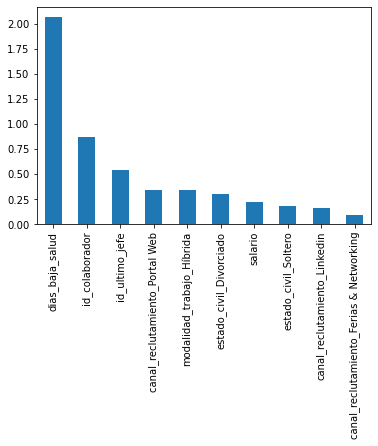

In [73]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'));

AxesSubplot(0.125,0.125;0.775x0.755)


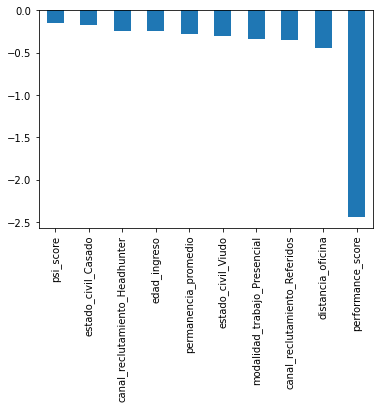

In [74]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [75]:
# llamamos el metodo para crear la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 792x792 with 0 Axes>

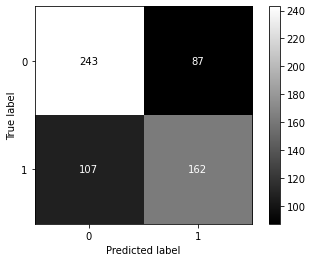

In [76]:
# Size de la grafica
fig = plt.figure(figsize=(11,11))

# creacion de la matriz
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)

# visualizacion de la matriz
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

In [77]:
# Calcular métricas a partir de la matriz de confusión
TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

In [78]:
# Calcular precisión, sensibilidad, especificidad, y tasa de error
precision = TP / (TP + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
tasa_error = (FP + FN) / (TP + TN + FP + FN)

# Imprimir las métricas
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)
print("Tasa de Error:", tasa_error)
print('f1-score: ',(2*precision*sensibilidad)/(precision + sensibilidad))

Precisión: 0.6506024096385542
Sensibilidad: 0.6022304832713755
Especificidad: 0.7363636363636363
Tasa de Error: 0.32387312186978295
f1-score:  0.6254826254826256


# Prediccion del modelo para test_data

In [79]:
# creamos la nueva prediccion
prediction_test = model.predict(Xt)

In [80]:
# convertimos las predicciones a un dataframe
df_pred = pd.DataFrame(prediction_test, columns=['abandono_6meses'])
df_pred.head()

,abandono_6meses
0,0
1,1
2,1
3,0
4,0


In [81]:
df_invert = Xt.copy(deep=True)
df_invert

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,0.116491,0.668605,0.0,0.049157,0.086957,0.038462,0.058174,1.000000,0.575,0.264151,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.899329,0.430233,0.0,0.115178,0.043478,0.000000,0.035884,0.894737,0.425,0.169811,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.943672,0.872093,0.0,0.162540,0.043478,0.192308,0.181516,0.842105,0.275,0.528302,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.418025,1.000000,0.0,0.148906,0.130435,0.076923,0.095145,0.789474,0.375,0.396226,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.248562,0.348837,0.0,0.326516,0.130435,0.346154,0.341358,0.789474,0.575,0.679245,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.900048,0.936047,0.0,0.207033,0.086957,0.576923,0.342726,0.526316,0.275,0.811321,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2016,0.953020,0.994186,0.0,0.191245,0.000000,0.153846,0.329712,0.684211,0.200,0.811321,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2017,0.986337,0.837209,0.0,0.278436,0.043478,0.230769,0.438901,0.210526,0.275,0.811321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2018,0.939597,0.883721,0.0,0.501615,0.043478,0.269231,0.352749,0.578947,0.425,0.849057,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
# aplicar la inversa
df_invert[Xt.columns] = scaler.inverse_transform(Xt[Xt.columns])
df_invert.head()

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,100486.0,102115.0,1.0,0.795,2.0,2.0,181654.0,99.0,81.0,24.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,103752.0,102074.0,1.0,1.715,1.0,1.0,140986.0,97.0,75.0,19.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,103937.0,102150.0,1.0,2.375,1.0,6.0,406690.0,96.0,69.0,38.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,101744.0,102172.0,1.0,2.185,3.0,3.0,249107.0,95.0,73.0,31.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,101037.0,102060.0,1.0,4.660,3.0,10.0,698318.0,95.0,81.0,46.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [83]:
df_invert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_colaborador                           2020 non-null   float64
 1   id_ultimo_jefe                           2020 non-null   float64
 2   seniority                                2020 non-null   float64
 3   distancia_oficina                        2020 non-null   float64
 4   dias_baja_salud                          2020 non-null   float64
 5   permanencia_promedio                     2020 non-null   float64
 6   salario                                  2020 non-null   float64
 7   performance_score                        2020 non-null   float64
 8   psi_score                                2020 non-null   float64
 9   edad_ingreso                             2020 non-null   float64
 10  modalidad_trabajo_Híbrida                2020 no

In [84]:
df_pred['ID'] = df_invert['id_colaborador'].values

df_pred['ID'] = df_pred['ID'].astype(int)

# reordenar variables
df_pred = df_pred[['ID','abandono_6meses']]

df_pred

,ID,abandono_6meses
0,100486,0
1,103752,1
2,103937,1
3,101744,0
4,101037,0
...,...,...
2015,103755,1
2016,103976,1
2017,104115,1
2018,103920,1


# Exportar Predicciones

In [85]:
# exportar predicciones
df_pred.to_csv('submission_1.csv', index=False)